# Assignment 2

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

An NOAA dataset has been stored in the file `data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv`. This is the dataset to use for this assignment. Note: The data for this assignment comes from a subset of The National Centers for Environmental Information (NCEI) [Daily Global Historical Climatology Network](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt) (GHCN-Daily). The GHCN-Daily is comprised of daily climate records from thousands of land surface stations across the globe.

Each row in the assignment datafile corresponds to a single observation.

The following variables are provided to you:

* **id** : station identification code
* **date** : date in YYYY-MM-DD format (e.g. 2012-01-24 = January 24, 2012)
* **element** : indicator of element type
    * TMAX : Maximum temperature (tenths of degrees C)
    * TMIN : Minimum temperature (tenths of degrees C)
* **value** : data value for element (tenths of degrees C)

For this assignment, you must:

1. Read the documentation and familiarize yourself with the dataset, then write some python code which returns a line graph of the record high and record low temperatures by day of the year over the period 2005-2014. The area between the record high and record low temperatures for each day should be shaded.
2. Overlay a scatter of the 2015 data for any points (highs and lows) for which the ten year record (2005-2014) record high or record low was broken in 2015.
3. Watch out for leap days (i.e. February 29th), it is reasonable to remove these points from the dataset for the purpose of this visualization.
4. Make the visual nice! Leverage principles from the first module in this course when developing your solution. Consider issues such as legends, labels, and chart junk.

The data you have been given is near **Ann Arbor, Michigan, United States**, and the stations the data comes from are shown on the map below.

<IPython.core.display.Javascript object>


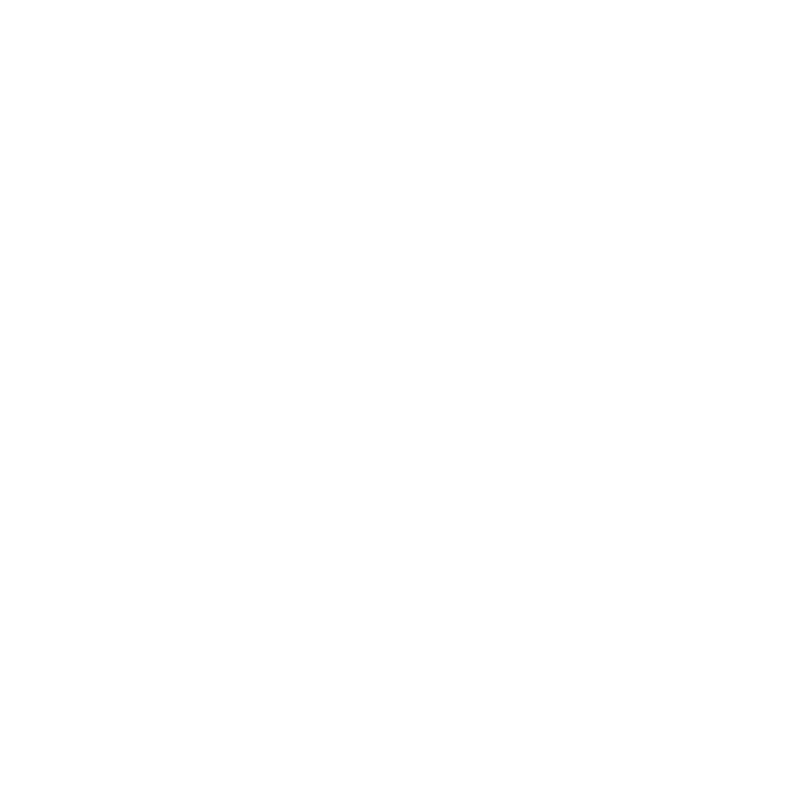

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\display.py:701: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


In [75]:
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import matplotlib.ticker as ticker
import pandas as pd
import numpy as np
#! pip install mplleaflet --user
import mplleaflet


def leaflet_plot_stations(binsize, hashid):

    df = pd.read_csv('data/C2A2_data/BinSize_d{}.csv'.format(binsize))

    station_locations_by_hash = df[df['hash'] == hashid]

    lons = station_locations_by_hash['LONGITUDE'].tolist()
    lats = station_locations_by_hash['LATITUDE'].tolist()

    plt.figure(figsize=(8,8))

    plt.scatter(lons, lats, c='r', alpha=0.7, s=200)

    return mplleaflet.display()

leaflet_plot_stations(400,'fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89')

In [188]:
#Read data
df = pd.read_csv('data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv')

#Change scale of temperature (tenth of celcius)
df['Data_Value'] = df['Data_Value']/10

#Change Date to date format
df['Date'] = pd.to_datetime(df.Date)

# Get year of each day
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

# Get month and day of each day
df['Month_Day'] = df['Date'].dt.strftime('%m-%d')

# Remove February 29
df = df[df['Month_Day']!='02-29']
df.head()

,ID,Date,Element,Data_Value,Year,Month,Day,Month_Day
0,USW00094889,2014-11-12,TMAX,2.2,2014,11,12,11-12
1,USC00208972,2009-04-29,TMIN,5.6,2009,4,29,04-29
2,USC00200032,2008-05-26,TMAX,27.8,2008,5,26,05-26
3,USC00205563,2005-11-11,TMAX,13.9,2005,11,11,11-11
4,USC00200230,2014-02-27,TMAX,-10.6,2014,2,27,02-27


In [211]:
print('### Df Types ###')
print(df.dtypes)
print('')
print('###  Min and max of Date ###')
print(df['Date'].min(), df['Date'].max())
print('')
print('### Values of Elements###')
print(df['Element'].unique())
print('')

#A brief summary of data
#There is only one numeric column
import numpy as np
print('###Summary of temperature###')
print(df.dropna().describe())
print('')

df.groupby(['Month_Day','Element'])['Data_Value'].describe().unstack()

### Df Types ###
ID                    object
Date          datetime64[ns]
Element               object
Data_Value           float64
Year                   int64
Month                  int64
Day                    int64
Month_Day             object
dtype: object

###  Min and max of Date ###
2005-01-01 00:00:00 2015-12-31 00:00:00

### Values of Elements###
['TMAX' 'TMIN']

###Summary of temperature###
          Data_Value           Year          Month            Day
count  165002.000000  165002.000000  165002.000000  165002.000000
mean        9.547632    2009.968085       6.531975      15.732464
std        12.351344       3.092705       3.447177       8.797352
min       -34.300000    2005.000000       1.000000       1.000000
25%         0.000000    2007.000000       4.000000       8.000000
50%         9.400000    2010.000000       7.000000      16.000000
75%        18.900000    2013.000000      10.000000      23.000000
max        40.600000    2015.000000      12.000000      31.000000


count             mean                 std             min        \
Element     TMAX   TMIN      TMAX      TMIN      TMAX      TMIN  TMAX  TMIN   
Month_Day                                                                     
01-01      215.0  217.0  2.693953 -5.185253  6.406707  5.612277  -9.3 -16.0   
01-02      229.0  227.0  1.081659 -7.722907  5.907556  5.419002 -10.0 -26.7   
01-03      229.0  227.0 -0.659825 -9.179736  5.944100  7.352071 -11.7 -26.7   
01-04      233.0  222.0  0.306438 -6.879730  4.633973  6.672046 -10.0 -26.1   
01-05      229.0  224.0  1.515284 -6.349554  3.996049  5.000951  -8.8 -15.5   
...          ...    ...       ...       ...       ...       ...   ...   ...   
12-27      228.0  226.0  3.580702 -3.165929  4.516741  3.980680  -3.9 -13.8   
12-28      227.0  228.0  3.618943 -4.597368  4.898613  4.549938  -4.4 -16.6   
12-29      224.0  221.0  2.649107 -4.947511  3.815710  4.031304  -5.0 -15.0   
12-30      226.0  223.0  2.370354 -5.026457  3.968426  4.259464  -6.6 -14.4   
12-31      224.0  221.0  1.650000 -4.490950  5.064986  5.078852  -7.8 -15.0   

             25%        50%        75%          max       
Element     TMAX  TMIN TMAX TMIN  TMAX   TMIN  TMAX TMIN  
Month_Day                                                 
01-01     -2.100 -10.6  1.7 -4.4  7.50  0.000  15.6  7.2  
01-02     -2.800 -11.7  0.6 -7.8  5.60 -3.900  13.9  2.8  
01-03     -4.400 -15.0 -1.7 -9.4  3.30 -3.900  13.3  2.8  
01-04     -3.200 -10.6  0.6 -7.1  2.80 -0.725  10.6  4.4  
01-05     -1.100  -9.4  1.7 -6.7  2.80 -3.900  12.8  9.4  
...          ...   ...  ...  ...   ...    ...   ...  ...  
12-27      0.000  -5.6  2.8 -2.8  6.70 -0.600  18.9  9.4  
12-28     -0.500  -7.8  2.8 -3.9  5.85 -0.600  19.4  6.1  
12-29     -0.600  -7.8  2.2 -5.0  5.60 -1.700  12.8  2.8  
12-30     -1.075  -8.8  1.7 -3.9  5.60 -1.100  11.7  1.7  
12-31     -1.700  -9.4  1.1 -3.9  6.10 -0.600  13.9  6.7  

[365 rows x 16 columns]

In [237]:
from datetime import datetime
#df.groupby(['Date'])['Data_Value'].describe()#.unstack()
#df.groupby('Date').aggregate([np.min, np.max])
#df.groupby('Date').aggregate({'Data_Value':'min', 'Data_Value':'max'})

df2 = df[df['Year'] != 2015]
print('### min and max of new Date ###')
print(df2['Date'].min(), df2['Date'].max())
print("")
df2 = df2.set_index('Month_Day').groupby(level=0).agg(minT =('Data_Value',np.min), maxT =('Data_Value',np.max), 
                                                      day=('Day',np.mean), month=('Month',np.mean))

df3 = df[df['Year'] == 2015]
print('### min and max of new Date ###')
print(df3['Date'].min(), df3['Date'].max())
print("")
df3 = df3.set_index('Month_Day').groupby(level=0).agg(minT2015 =('Data_Value',np.min), maxT2015 =('Data_Value',np.max))

print("")
print(df2.shape, df3.shape)

database = pd.merge(df2,df3, left_index=True, right_index=True)
print("")
print(database.shape)

database = database.reset_index()
#database['Date']=str('2015/'+str(database['month'])+'/'+str(database['day']))
#database['Date']= datetime.datetime(year=2015,month=database['month'],day=database['day'])

print('### Df Types ###')
print(database.dtypes)
print('')

database['Date'] = (2015*10000)+(database['month']*100)+database['day']
database['Date'] = pd.to_datetime(database['Date'], format='%Y%m%d')

min1 = database['Date'].min()
max1 = database['Date'].max()
database = database.set_index('Date')
print("")
print("### Min and Max 2015 ###")
print(min1, max1)

database.head()

#min_value = df2['minT']
#max_value = df2['maxT']

### min and max of new Date ###
2005-01-01 00:00:00 2014-12-31 00:00:00

### min and max of new Date ###
2015-01-01 00:00:00 2015-12-31 00:00:00


(365, 4) (365, 2)

(365, 6)
### Df Types ###
Month_Day     object
minT         float64
maxT         float64
day            int64
month          int64
minT2015     float64
maxT2015     float64
dtype: object


### Min and Max 2015 ###
2015-01-01 00:00:00 2015-12-31 00:00:00


,Month_Day,minT,maxT,day,month,minT2015,maxT2015
Date,,,,,,,
2015-01-01,01-01,-16.0,15.6,1,1,-13.3,1.1
2015-01-02,01-02,-26.7,13.9,2,1,-12.2,3.9
2015-01-03,01-03,-26.7,13.3,3,1,-6.7,3.9
2015-01-04,01-04,-26.1,10.6,4,1,-8.8,4.4
2015-01-05,01-05,-15.0,12.8,5,1,-15.5,2.8


In [221]:
#Max values on 2015
max2015 = database[database['maxT2015'] > database['maxT']]
#Min values on 2015
min2015 = database[database['minT2015'] < database['minT']]
print(max2015.head(), max2015.shape)
print(min2015.head(), min2015.shape)
#max2015.index


           Month_Day  minT  maxT  day  month  minT2015  maxT2015
Date                                                            
2015-02-09     02-09 -21.0   7.8    9      2     -11.6       8.3
2015-04-17     04-17  -8.9  24.4   17      4       4.4      27.8
2015-05-07     05-07  -2.8  25.6    7      5       8.3      30.6
2015-05-08     05-08   0.0  31.7    8      5       8.9      33.3
2015-05-11     05-11  -1.1  29.4   11      5      13.3      30.6 (37, 7)
           Month_Day  minT  maxT  day  month  minT2015  maxT2015
Date                                                            
2015-01-05     01-05 -15.0  12.8    5      1     -15.5       2.8
2015-01-11     01-11 -18.3  15.6   11      1     -20.0       0.6
2015-02-03     02-03 -23.2   8.9    3      2     -23.8      -2.1
2015-02-14     02-14 -21.7  10.6   14      2     -23.9      -2.7
2015-02-15     02-15 -25.6  11.7   15      2     -26.0      -3.9 (32, 7)


<IPython.core.display.Javascript object>


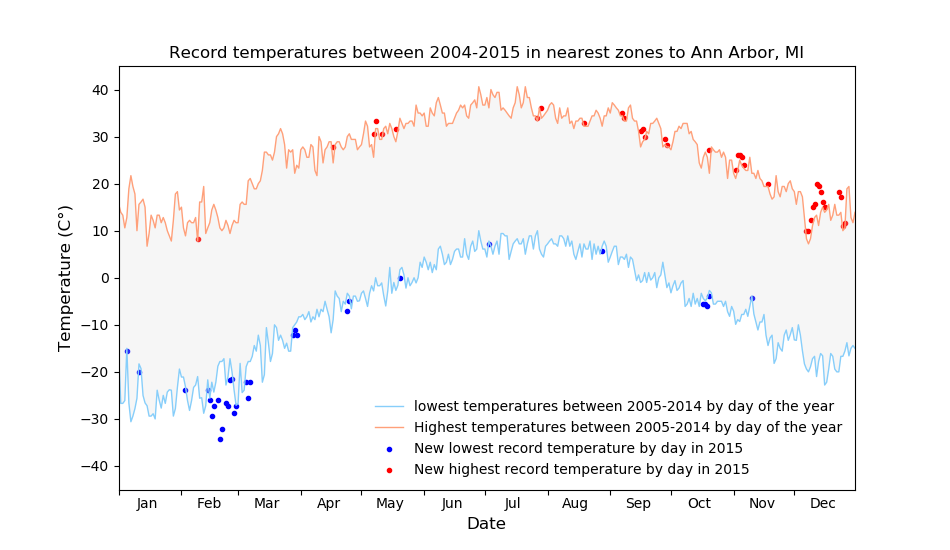

In [270]:
%matplotlib notebook
import matplotlib as mpl
import matplotlib.pyplot as plt

# Create datetime index
date_index = np.arange('2015-01-01','2016-01-01', dtype='datetime64[D]')

plt.figure(figsize=(9.5,5.5))
plt.plot(date_index, database['minT'], c='lightskyblue',linewidth=1)
plt.plot(date_index, database['maxT'], c='lightsalmon',linewidth=1)
plt.scatter(min2015.index, min2015['minT2015'], s=9, c='blue')
plt.scatter(max2015.index, max2015['maxT2015'], s=9, c='red')

ax = plt.gca()
ax.fill_between(date_index, database['minT'], database['maxT'], facecolor='lightgrey', alpha=0.20)
ax.axis([min1, max1, -45, 45])

# Format the xticks to show the month centered
# Original code can be found here:
# http://matplotlib.org/examples/pylab_examples/centered_ticklabels.html
ax.xaxis.set_major_locator(dates.MonthLocator())
ax.xaxis.set_minor_locator(dates.MonthLocator(bymonthday=15))
ax.xaxis.set_major_formatter(ticker.NullFormatter())
ax.xaxis.set_minor_formatter(dates.DateFormatter('%b'))
for tick in ax.xaxis.get_minor_ticks():
    tick.tick1line.set_markersize(0)
    tick.tick2line.set_markersize(0)
    tick.label1.set_horizontalalignment('center')

#Axes labels
plt.xlabel('Date', fontsize=12, family="sans-serif")
plt.ylabel('Temperature (C°)', fontsize=12, family="sans-serif")
plt.title('Record temperatures between 2004-2015 in nearest zones to Ann Arbor, MI')

plt.legend(['lowest temperatures between 2005-2014 by day of the year', 
            'Highest temperatures between 2005-2014 by day of the year',
            "New lowest record temperature by day in 2015", 
            "New highest record temperature by day in 2015"],
           loc='best', frameon=False, fontsize=10)#, family="sans-serif")

plt.savefig('linesplotAssigment.png')